In [1]:
!pip install tensorflow==2.3.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 71.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.0/459.0 kB 34.7 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.0:
      Successfully uninstalled tensorflow-estimator-2.11.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.8.0
    Uninstalling h5

In [2]:

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re
import unidecode
import string

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, classification_report,accuracy_score
import tensorflow as tf

In [3]:
data = pd.read_csv('/kaggle/input/transformer/fulltrain.csv',names = ['label', 'text'])
data

,label,text
0,1,"A little less than a decade ago, hockey fans w..."
1,1,The writers of the HBO series The Sopranos too...
2,1,Despite claims from the TV news outlet to offe...
3,1,After receiving 'subpar' service and experienc...
4,1,After watching his beloved Seattle Mariners pr...
...,...,...
48849,4,The ruling Kuomintang (KMT) has claimed owners...
48850,4,The Taipei city government has encouraged the ...
48851,4,President Ma Ying-jeou said Friday that a park...
48852,4,The families of the four people who were kille...


In [4]:
data_copy = data.copy()


In [5]:

def remove_accented_chars(text):
    """remove accented characters from text, e.g. café"""
    text = unidecode.unidecode(text)
    return text

def lower_case(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    return sentence

contractions_dict = {"isn't": "is not", "aren't": "are not","can't": "cannot", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

def remove_html_tag(text):
    tag_regex = r"<[^>]+>"
    tag_pattern = re.compile(tag_regex)
    return tag_pattern.sub("", text)

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])


def build_dataset(data):
    # remove html tags
    data['text'] = data['text'].apply(lambda x: remove_html_tag(x))
    # remove punctuation
    data['text'] = data['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))
    # remove accented chars
    data['text'] = data['text'].apply(lambda x:remove_accented_chars(x))
    # lower case
    data['text'] = data['text'].apply(lambda x:lower_case(x))
    # Expand Contractions
    data['text'] = data['text'].apply(lambda x:expand_contractions(x))
    # remove stopwords
#     data['text'] = data['text'].apply(lambda x:remove_stopwords(x))
    tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=15000)
    tokenizer.fit_on_texts(data['text'])
    data['text'] = tokenizer.texts_to_sequences(data['text'])
    
    X = data['text']
    y = data['label']-1
    X_train,  X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, shuffle=True, stratify=y, random_state=42)
    
    return X_train, X_valid, y_train, y_valid

In [6]:
# remove html tags
data_copy['text'] = data_copy['text'].apply(lambda x: remove_html_tag(x))
# remove punctuation
data_copy['text'] = data_copy['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))
# remove accented chars
data_copy['text'] = data_copy['text'].apply(lambda x:remove_accented_chars(x))
# lower case
data_copy['text'] = data_copy['text'].apply(lambda x:lower_case(x))
# Expand Contractions
data_copy['text'] = data_copy['text'].apply(lambda x:expand_contractions(x))

In [7]:
X_train, X_valid, y_train, y_valid = build_dataset(data)

In [8]:
MAXLEN = 1024  # Maximum length of all sequences

X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=MAXLEN)
X_valid = tf.keras.preprocessing.sequence.pad_sequences(X_valid, maxlen=MAXLEN)


In [9]:
# class TransformerBlock(tf.keras.layers.Layer):
#     def __init__(self, embed_dim, num_heads, hidden_dim, rate=0.1):
#         super().__init__()
#         self.attention = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
#         self.ffn = tf.keras.Sequential(
#             [tf.keras.layers.Dense(hidden_dim, activation="relu"), tf.keras.layers.Dense(embed_dim),]
#         )
#         self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
#         self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
#         self.dropout1 = tf.keras.layers.Dropout(rate)
#         self.dropout2 = tf.keras.layers.Dropout(rate)

#     def call(self, inputs, training):
#         attn_output = self.attention(inputs, inputs)
#         attn_output = self.dropout1(attn_output, training=training)
#         out1 = self.layernorm1(inputs + attn_output)
#         ffn_output = self.ffn(out1)
#         ffn_output = self.dropout2(ffn_output, training=training)
#         return self.layernorm2(out1 + ffn_output)

In [10]:
class TokenAndPositionEmbedding(tf.keras.layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        self.token_emb = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = tf.keras.layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [11]:
if len(y_train.shape) != 2:
    y_train = tf.keras.utils.to_categorical(y_train, num_classes = 4)
    y_valid = tf.keras.utils.to_categorical(y_valid, num_classes = 4)

In [12]:
# embed_dim = 32  # Embedding size for each token
# num_heads = 2  # Number of attention heads
# hidden_dim = 32  # Hidden layer size in feed forward network inside transformer

# def create_transformer(embed_dim, num_heads, hidden_dim):
#     inputs = tf.keras.layers.Input(shape=(MAXLEN,))
#     embedding_layer = TokenAndPositionEmbedding(MAXLEN, 15000, embed_dim)
#     x = embedding_layer(inputs)
#     transformer_block = TransformerBlock(embed_dim, num_heads, hidden_dim)
#     x = transformer_block(x)
#     x = tf.keras.layers.GlobalAveragePooling1D()(x)
#     x = tf.keras.layers.Dropout(0.1)(x)
#     x = tf.keras.layers.Dense(64, activation="relu")(x)
#     x = tf.keras.layers.Dropout(0.1)(x)
#     outputs = tf.keras.layers.Dense(4, activation="softmax",name = 'classification')(x)

#     model =tf. keras.Model(inputs=inputs, outputs=outputs)
#     model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-3),
#                   loss=tf.keras.losses.CategoricalCrossentropy(),
#                   metrics=tf.keras.metrics.Accuracy(name = 'Accuracy'))
#     return model


In [13]:
# transformer = create_transformer(embed_dim, num_heads, hidden_dim)

# es = tf.keras.callbacks.EarlyStopping(monitor='classification_loss', min_delta =1e-4 , patience = 3 ,mode = 'auto', restore_best_weights = True, verbose = 1)
# history = transformer.fit(
#     X_train, y_train, batch_size=64, epochs=4, validation_data=(X_valid, y_valid),callbacks = [es], verbose = 1
# )

In [14]:
# model.save('transformer.h5')

In [15]:
!git clone -b master https://github.com/xl402/performer.git

Cloning into 'performer'...
remote: Enumerating objects: 627, done.
remote: Counting objects: 100% (131/131), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 627 (delta 53), reused 95 (delta 28), pack-reused 496
Receiving objects: 100% (627/627), 607.37 KiB | 6.82 MiB/s, done.
Resolving deltas: 100% (321/321), done.


In [16]:
import sys
sys.path.append('/kaggle/working/performer/')
from performer.networks.linear_attention import Performer


In [17]:
class PerformerBlock(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, hidden_dim, rate=0.1):
        super(PerformerBlock, self).__init__()
        self.attention = Performer(num_heads=num_heads, key_dim=embed_dim, attention_method='linear', supports=2)
        self.ffn = tf.keras.Sequential(
            [tf.keras.layers.Dense(hidden_dim, activation="relu"), tf.keras.layers.Dense(embed_dim),]
        )
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, inputs, training):
        attention_output = self.attention([inputs, inputs])
        attention_output = self.dropout1(attention_output, training=training)
        out1 = self.layernorm1(inputs + attention_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [18]:
embed_dim = 32  # Embedding size for each token
num_heads = 8  # Number of attention heads
hidden_dim = 32  # Hidden layer size in feed forward network inside performer transformer

def create_performer_transformer(embed_dim, num_heads,hidden_dim, dropout_rate = 0.1):
    inputs = tf.keras.layers.Input(shape=(MAXLEN,))
    embedding_layer = TokenAndPositionEmbedding(MAXLEN, 15000, embed_dim)
    x = embedding_layer(inputs)
    performer_block = PerformerBlock(embed_dim, num_heads,hidden_dim)
    x = performer_block(x)
    x = tf.keras.layers.GlobalAveragePooling1D()(x)
    x = tf.keras.layers.Dropout(0.1)(x)
    x = tf.keras.layers.Dense(64, activation="relu")(x)
    x = tf.keras.layers.Dropout(0.1)(x)
    outputs = tf.keras.layers.Dense(4, activation="softmax",name = 'classification')(x)

    model =tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-3),
                  loss=tf.keras.losses.CategoricalCrossentropy(), 
                  metrics=tf.keras.metrics.CategoricalAccuracy(name = 'Accuracy'))
    return model

In [19]:
performer_transformer = create_performer_transformer(embed_dim, num_heads,hidden_dim)

# es = tf.keras.callbacks.EarlyStopping(monitor = 'val_Accuracy', min_delta = 1e-4, patience = 2,mode = 'auto', restore_best_weights = True, verbose = 1)
# history = performer_transformer.fit(
#     X_train, y_train, batch_size=64, epochs=5, validation_data=(X_valid, y_valid),callbacks = [es], verbose = 1
# )
history = performer_transformer.fit(
    X_train, y_train, batch_size=64, epochs=3, validation_data=(X_valid, y_valid), verbose = 1
)

Epoch 1/3
687/687 [==============================] - 985s 1s/step - loss: 0.3217 - Accuracy: 0.8699 - val_loss: 0.1481 - val_Accuracy: 0.9546
Epoch 2/3
687/687 [==============================] - 958s 1s/step - loss: 0.0624 - Accuracy: 0.9805 - val_loss: 0.0963 - val_Accuracy: 0.9691
Epoch 3/3
687/687 [==============================] - 991s 1s/step - loss: 0.0310 - Accuracy: 0.9909 - val_loss: 0.1289 - val_Accuracy: 0.9660


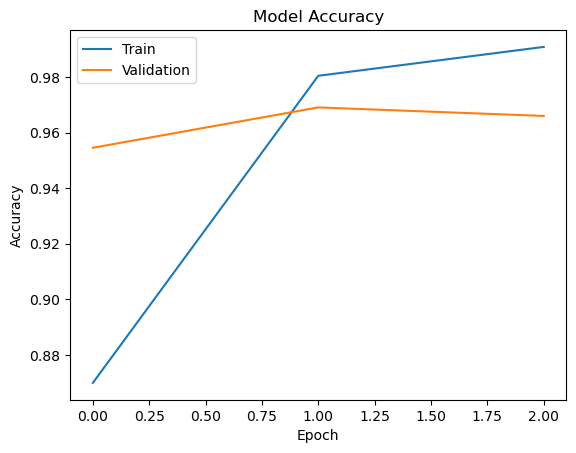

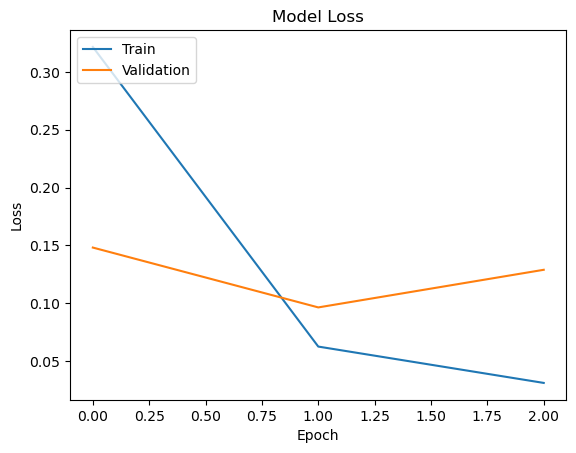

In [20]:
import matplotlib.pyplot as plt

# draw plots for the model training history
plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [21]:
y_train_pred = performer_transformer.predict(X_train)
y_train_pred = np.argmax(y_train_pred, axis = 1)
y_train_1d = np.argmax(y_train, axis=1)
print('training metrics')
print(classification_report(y_train_1d, y_train_pred))
print(accuracy_score(y_train_1d, y_train_pred))

y_valid_pred = performer_transformer.predict(X_valid)
y_valid_pred = np.argmax(y_valid_pred, axis = 1)
y_valid_1d = np.argmax(y_valid, axis=1)
print('validation metrics')
print(classification_report(y_valid_1d, y_valid_pred))
print(accuracy_score(y_valid_1d, y_valid_pred))

training metrics
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     12642
           1       1.00      1.00      1.00      6248
           2       1.00      1.00      1.00     16083
           3       0.99      1.00      0.99      8995

    accuracy                           1.00     43968
   macro avg       1.00      1.00      1.00     43968
weighted avg       1.00      1.00      1.00     43968

0.9957469068413392
validation metrics
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1405
           1       0.98      0.98      0.98       694
           2       0.98      0.98      0.98      1787
           3       0.93      0.95      0.94      1000

    accuracy                           0.97      4886
   macro avg       0.96      0.97      0.96      4886
weighted avg       0.97      0.97      0.97      4886

0.9660253786328284


In [22]:
# y_valid_pred = performer_transformer.predict(X_valid)
# y_valid_pred = np.argmax(y_valid_pred, axis = 1)
# y_valid_1d = np.argmax(y_valid, axis=1)

bad_cases = np.where(y_valid_1d != y_valid_pred)[0]
for i in bad_cases:
    print('Bad case:', i)
    print('True label:', y_valid_1d[i])
    print('Predicted label:', y_valid_pred[i])

Bad case: 97
True label: 3
Predicted label: 0
Bad case: 117
True label: 0
Predicted label: 1
Bad case: 170
True label: 0
Predicted label: 3
Bad case: 197
True label: 0
Predicted label: 3
Bad case: 226
True label: 1
Predicted label: 0
Bad case: 237
True label: 0
Predicted label: 3
Bad case: 336
True label: 3
Predicted label: 0
Bad case: 383
True label: 0
Predicted label: 2
Bad case: 389
True label: 2
Predicted label: 3
Bad case: 440
True label: 1
Predicted label: 0
Bad case: 516
True label: 2
Predicted label: 1
Bad case: 531
True label: 1
Predicted label: 2
Bad case: 542
True label: 1
Predicted label: 3
Bad case: 595
True label: 0
Predicted label: 3
Bad case: 620
True label: 3
Predicted label: 0
Bad case: 625
True label: 0
Predicted label: 3
Bad case: 640
True label: 2
Predicted label: 0
Bad case: 653
True label: 1
Predicted label: 2
Bad case: 671
True label: 2
Predicted label: 3
Bad case: 696
True label: 0
Predicted label: 3
Bad case: 706
True label: 2
Predicted label: 3
Bad case: 731


In [23]:
test_data = pd.read_csv('/kaggle/input/transformer/balancedtest.csv',names = ['label', 'text'])
test_data

,label,text
0,1,When so many actors seem content to churn out ...
1,1,In what football insiders are calling an unex...
2,1,In a freak accident following Game 3 of the N....
3,1,North Koreas official news agency announced to...
4,1,The former Alaska Governor Sarah Palin would b...
...,...,...
2995,4,The Air Force mistakenly gave rival companies ...
2996,4,The United Nations climate chief on Friday cha...
2997,4,River Plate midfielder Diego Buonanotte has un...
2998,4,Lawmakers were on the brink Tuesday of exempti...


In [24]:
test_data['text'] = test_data['text'].apply(lambda x: remove_html_tag(x))
# remove punctuation
test_data['text'] = test_data['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))
# remove accented chars
test_data['text'] = test_data['text'].apply(lambda x:remove_accented_chars(x))
# lower case
test_data['text'] = test_data['text'].apply(lambda x:lower_case(x))
# Expand Contractions
test_data['text'] = test_data['text'].apply(lambda x:expand_contractions(x))

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=15000)
tokenizer.fit_on_texts(data_copy['text'])
test_data['text'] = tokenizer.texts_to_sequences(test_data['text'])

In [25]:
test_text = tf.keras.preprocessing.sequence.pad_sequences(test_data['text'], maxlen=MAXLEN)

In [26]:
y_true = test_data['label']-1
y_pred = performer_transformer.predict(test_text)

y_pred = np.argmax(y_pred, axis = 1)
print(classification_report(y_true, y_pred))
print(accuracy_score(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.68      0.77       750
           1       0.64      0.35      0.45       750
           2       0.58      0.81      0.67       750
           3       0.72      0.93      0.82       750

    accuracy                           0.69      3000
   macro avg       0.71      0.69      0.68      3000
weighted avg       0.71      0.69      0.68      3000

0.6923333333333334
